In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kavit88/Linear-Regression/main/Marksheet.csv')

In [3]:
# data cleaning
df = df[(df['TEST-1 MARKS']!='AB') & (df['TEST-2 MARKS']!='AB') & (df['TEST-3 MARKS']!='AB') & (df['TEST-4 MARKS']!='AB')]

df['TEST-1 MARKS'] = df['TEST-1 MARKS'].astype('float64')
df['TEST-2 MARKS'] = df['TEST-2 MARKS'].astype('float64')
df['TEST-3 MARKS'] = df['TEST-3 MARKS'].astype('float64')
df['TEST-4 MARKS'] = df['TEST-4 MARKS'].astype('float64')

df['Total Marks'] = df['TEST-1 MARKS'] + df['TEST-2 MARKS'] + df['TEST-3 MARKS'] + df['TEST-4 MARKS']
df

,sr no,Branch,Enrolment No,Name,Roll No,Div,Mentor Name,TEST-1 MARKS,TEST-2 MARKS,TEST-3 MARKS,TEST-4 MARKS,Total Marks
0,1,CE,2.200220e+13,KATHIRIYA VRAJKUMAR ASHVINBHAI,110,A4,UMM,22.5,18.0,22.5,14.5,77.5
1,2,CE,2.300220e+13,AGRAVAT SAHIL RAJARAMBHAI,101,A3,SAS,21.5,20.0,19.0,14.0,74.5
2,3,CE,2.300220e+13,BALAR RAGHUBHAI SURESHBHAI,162,A5,KMS,17.0,20.5,19.0,19.0,75.5
3,4,CE,2.300220e+13,BALESANA HASSANBHAI YUNUSBHAI,122,A4,UMM,21.0,17.5,9.0,22.0,69.5
4,5,CE,2.300220e+13,BAMBHROLIYA HIT NARESHBHAI,87,A3,UMS,24.0,22.0,21.5,24.0,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...
297,299,AIDS,2.400220e+13,SHELADIYA HARSH,41,A9,MGV,18.5,15.0,11.0,12.0,56.5
298,300,AIDS,2.400220e+13,HET THESIYA,43,A9,UMM,22.0,13.5,11.5,16.5,63.5
299,301,AIDS,2.400220e+13,VAIDYA YOGANSHU VIRENBHAI,30,A9,KMS,21.5,15.0,13.5,15.5,65.5
300,302,AIDS,2.400220e+13,VIRJA DEEP BHARATBHAI,35,A9,MGV,24.5,20.0,23.0,16.0,83.5


In [13]:
# div wise avg of total marks
divs = df['Div'].unique()
avg_div = {}
for div in divs:
    div_df = df[df['Div']==div]['Total Marks']
    avg_div[div] = div_df.sum() / len(div_df)
    
avg_div

{'A4': 74.38571428571429,
 'A3': 79.45714285714286,
 'A5': 70.55714285714286,
 'A2': 83.63888888888889,
 'A1': 92.84722222222223,
 'A6': 59.51428571428571,
 'A7': 49.86363636363637,
 'A8': 78.41071428571429,
 'A9': 57.84615384615385}

In [16]:
# grade assigning
df['Grade'] = np.where(df['Total Marks']>=85,'A',
                      np.where(df['Total Marks']>=75,'B',
                               np.where(df['Total Marks']>=65,'C',
                                        np.where(df['Total Marks']>=50,'D',
                                                 np.where(df['Total Marks']>=35,'E','F')
                                                )
                                       )
                              )
                      )
                      
df.head()

,sr no,Branch,Enrolment No,Name,Roll No,Div,Mentor Name,TEST-1 MARKS,TEST-2 MARKS,TEST-3 MARKS,TEST-4 MARKS,Total Marks,Grade
0,1,CE,2.200220e+13,KATHIRIYA VRAJKUMAR ASHVINBHAI,110,A4,UMM,22.5,18.0,22.5,14.5,77.5,B
1,2,CE,2.300220e+13,AGRAVAT SAHIL RAJARAMBHAI,101,A3,SAS,21.5,20.0,19.0,14.0,74.5,C
2,3,CE,2.300220e+13,BALAR RAGHUBHAI SURESHBHAI,162,A5,KMS,17.0,20.5,19.0,19.0,75.5,B
3,4,CE,2.300220e+13,BALESANA HASSANBHAI YUNUSBHAI,122,A4,UMM,21.0,17.5,9.0,22.0,69.5,C
4,5,CE,2.300220e+13,BAMBHROLIYA HIT NARESHBHAI,87,A3,UMS,24.0,22.0,21.5,24.0,91.5,A


In [18]:
# reg task
x = df[['TEST-1 MARKS']]
y = df['Total Marks']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

lr = LinearRegression()

# fit model
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# intercept, slope

In [19]:
# predict total marks
y_pred = lr.predict(x_test)
print(y_pred)

[54.46537577 64.64723479 69.7381643  62.95025829 34.10165774 68.0411878
 85.01095283 74.82909381 66.3442113  52.76839927 74.82909381 79.92002332
 79.92002332 81.61699982 68.0411878  68.0411878  57.85932878 83.31397633
 85.01095283 37.49561074 73.13211731 76.52607031 74.82909381 83.31397633
 73.13211731 71.43514081 71.43514081 83.31397633 81.61699982 69.7381643
 74.82909381 69.7381643  51.07142277 83.31397633 76.52607031 78.22304682
 83.31397633 76.52607031 86.70792933 78.22304682 64.64723479 85.01095283
 81.61699982 57.85932878 56.16235228 74.82909381 79.92002332 73.13211731
 66.3442113  79.92002332 71.43514081 73.13211731 79.92002332 86.70792933
 83.31397633 71.43514081 83.31397633 76.52607031 81.61699982 74.82909381]


In [21]:
# MSE and R2 score
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MSE: 132.74864441803135
R2 Score: 0.5584500691644695


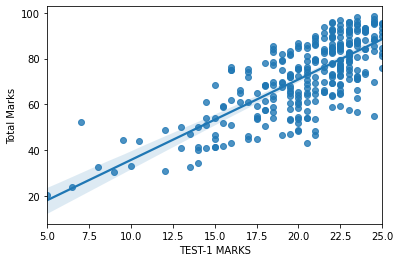

In [30]:
# scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=x,y=y)
plt.show()